In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import monotonic
from datetime import timedelta
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

GCD of two numbers

Let's suppose, that $a > b$. Let's prove, that:
$$
    gcd(a, b) = gcd(a \% b, b)
$$

$$
    gcd(a, b) | a; \quad gcd(a, b) | b
$$
It means, that:
$$
    a = A\cdot{gcd(a, b)}
$$
$$
    b = B\cdot{gcd(a, b)}
$$
where $A, B \in \mathbb{Z}$
$$
    a = (a // b)\cdot{b} + a \% b
$$
It means, that:
$$
    \frac{a}{gcd(a, b)} = (a // b)\frac{b}{gcd(a, b)} + \frac{a \% b}{gcd(a, b)}
$$
$$
    \frac{a \% b}{gcd(a, b)} = \frac{a}{gcd(a, b)} - (a // b)\frac{b}{gcd(a, b)} = A - (a // b)B \in \mathbb{Z}
$$
It means, that:
$$
    gcd(a, b) | a \% b
$$

Let's suppose, that $\exists N > gcd(a, b)$:
$$
    N | a \% b
$$
$$
    N | b
$$
$$
    a = (a // b)\cdot{b} + a \% b
$$
But because of two previous facts, we can finally say that:
$$
    N | a
$$
But it means, that N is divisor of a and b and it's bigger that gcd. It can't be true, because gcd is the biggest common divisor of two numbers

In [2]:
def gcd(a, b):
    a, b = abs(a), abs(b)
    while b > 0:
        a, b = b, a % b
    return a

The common knowledge that Fibonacci-sequence is the worst case of input in gcd-evaluation task. Let's check, how much time does it cost to evaluate gcd's for Fibonacci-sequence

In [9]:
fib_sequence = [1, 1]
for i in range(250):
    fib_sequence.append(fib_sequence[-1] + fib_sequence[-2])

In [10]:
times = []
TEST_AMOUNT = 10_000
for i in tqdm(range(len(fib_sequence) - 1)):
    a, b = fib_sequence[i], fib_sequence[i + 1]
    start_time = monotonic()
    for _ in range(TEST_AMOUNT):
        gcd(a, b)
    times.append((monotonic() - start_time) / TEST_AMOUNT)


<ipython-input-10-51723445023b>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(len(fib_sequence) - 1)):


In [58]:
reg.predict([[50]])

array([3.80263719e-06])

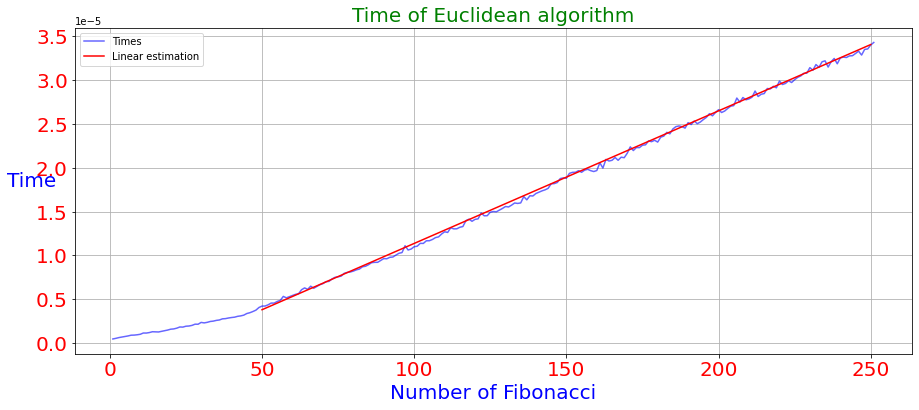

In [59]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(15, 6))
plt.plot(range(1, len(times) + 1),
         times,
         color="blue", 
         linestyle="-",
         label="Times",
         alpha=0.6)
reg = LinearRegression().fit(np.array(list(range(50, 251))).reshape(-1, 1), times[50:251])
plt.plot([50, 250],
         [reg.predict([[50]])[0], reg.predict([[250]])[0]],
         color="red", 
         linestyle="-",
         label="Linear estimation")
plt.legend(fontsize=15)
plt.grid(True)
plt.title("Time of Euclidean algorithm", fontsize=20, color="green")
plt.xlabel("Number of Fibonacci", fontsize=20, color="blue")
plt.ylabel("Time", fontsize=20, rotation=0, color="blue")
plt.xticks(fontsize=20, color="red")
plt.yticks(fontsize=20, color="red")
plt.legend()
plt.show()

# plt.plot([50, 250], [0.4e-5, 3.4e-5])

As we see, the complexity of gcd-algorithm is linear upon the order-number of Fibonacci-number. And this complexity is the worst. But Fibonacci number is exponencial upon it's order-number. So, the worst complexity of gcd-function is $O(\log{\min(a, b)})$


Let's prove, that 
$$
    lcm(a, b) = \frac{ab}{gcd(a, b)}
$$

$$
    lcm(a, b) = lcm(p_1^{\alpha_1}p_2^{\alpha_2}\dots p_n^{\alpha_n}, p_1^{\beta_1}p_2^{\beta_2}\dots p_n^{\beta_n}) =  p_1^{\max(\alpha_1, \beta_1)}p_2^{\max(\alpha_2, \beta_2)}\dots p_n^{\max(\alpha_n, \beta_n)}
$$
where $\alpha_i$, $\beta_i$ can be zero

Also, it is obvious, that:
$$
    gcd(a, b) = p_1^{\min(\alpha_1, \beta_1)}p_2^{\min(\alpha_2, \beta_2)}\dots p_n^{\min(\alpha_n, \beta_n)}
$$
If we look at the product:
$$
    ab = p_1^{\alpha_1 + \beta_1}p_2^{\alpha_2 + \beta_2}\dots p_n^{\alpha_n + \beta_n}
$$
And for tow numbers it is obvious, that:
$$
    \alpha + \beta = \max(\alpha, \beta) + \min(\alpha, \beta)
$$
That's why:
$$
    ab = gcd(a, b)\cdot lcm(a, b)
$$
And so:
$$
    lcm(a, b) = \frac{ab}{gcd(a, b)}
$$

In [69]:
def lcm(a, b):
    return abs(a * b) // gcd(a, b)

And now we have to understand, how to calculate `gcd` и `lcm` of the sequence. Let's show, that:
$$
    gcd(a_1, \dots, a_n, b_1, \dots, b_m) = gcd\left[gcd(a_1, \dots, a_n), gcd(b_1, \dots, b_m)\right]
$$
It becomes clear, if we understand, that `min`-function has this property and `gcd` is just product of prime numbers with minimal degree of all degrees among numbers. So the same result works also for `lcm`

That's why we come up with an idea of "Divide&Conquer" algo

The sequence is dividing into 2 groups and in each of group we estimate gcd. After this we calculate gcd of results and return as the answer

In [35]:
def gcd_two_numbers(a, b):
    a, b = abs(a), abs(b)
    while b > 0:
        a, b = b, a % b
    return a

def gcd(numbers):
    if len(numbers) == 1:
        return numbers[0]
    if len(numbers) == 2:
        return gcd_two_numbers(numbers[0], numbers[1])
    idx_divisor = len(numbers) // 2
    gcd1 = gcd(numbers[:idx_divisor])
    gcd2 = gcd(numbers[idx_divisor:])
    return gcd_two_numbers(gcd1, gcd2)

In [41]:
def lcm_two_numbers(a, b):
    return abs(a * b) // gcd_two_numbers(a, b)

def lcm(numbers):
    if len(numbers) == 1:
        return numbers[0]
    if len(numbers) == 2:
        return lcm_two_numbers(numbers[0], numbers[1])
    idx_divisor = len(numbers) // 2
    lcm1 = lcm(numbers[:idx_divisor])
    lcm2 = lcm(numbers[idx_divisor:])
    return lcm_two_numbers(lcm1, lcm2)

Result complexity of this algo with `n` numbers with $O(m)$-bit size of each number is $O(m\log{n})$